In [66]:
import numpy as np

In [67]:
current_price = 120000  # Obecna cena mieszkainia
annual_growth_rate = 0.05  # Roczny wzrost ceny (5%)
years = 5  # Liczba lat

bank_rate_annual = 0.12  # Roczna stopa procentowa banku (12%)
bank_rate_monthly = bank_rate_annual / 12  # Miesięczna stopa procentowa banku (1%)
months = years * 12  # Liczba miesięcy

Pkt. 1.  Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?

Obliczenie ceny mieszkania za 5 lat

In [68]:
future_price = current_price * (1 + annual_growth_rate) ** years # Obliczanie przyszłej ceny 1 +roczny wzrost podniesiony do potęgi liczby lat
print(f"Cena mieszkania za {years} lat wyniesie: {future_price:.2f} PLN")

Cena mieszkania za 5 lat wyniesie: 153153.79 PLN


ODP do pkt 1 - Cena mieszkania za 5 lat wyniesie: 153153.79 PLN

!! Wiem, że nie było w zadaniu ale mnie interesuje jak będzie rosła cena mieszkaina w kazdym roku:

In [69]:
for year in range(1, years + 1):
    price = current_price * (1 + annual_growth_rate) ** year
    print(f"Cena mieszkania po {year} latach: {price:.2f} PLN")

Cena mieszkania po 1 latach: 126000.00 PLN
Cena mieszkania po 2 latach: 132300.00 PLN
Cena mieszkania po 3 latach: 138915.00 PLN
Cena mieszkania po 4 latach: 145860.75 PLN
Cena mieszkania po 5 latach: 153153.79 PLN


Roczny przyrost wartości mieszkania

In [70]:
for year in range(years + 1):
    price = current_price * ((1 + annual_growth_rate) ** year)
    if year == 0: # ponieważ policzy dla ujemnego roku (year-1)
        growth = "-"
    else:
        growth = f"+{price - current_price * ((1 + annual_growth_rate) ** (year - 1)):.2f} PLN"
    print(f"Rok {year}: {price:>10.2f} PLN  {growth}")

Rok 0:  120000.00 PLN  -
Rok 1:  126000.00 PLN  +6000.00 PLN
Rok 2:  132300.00 PLN  +6300.00 PLN
Rok 3:  138915.00 PLN  +6615.00 PLN
Rok 4:  145860.75 PLN  +6945.75 PLN
Rok 5:  153153.79 PLN  +7293.04 PLN


Pkt. 2 Ile trzeba wpłacić do banku co miesiąc aby uzbierać na mieszkanie w ciągu 5 lat?

FV - future value - to kwota wpłacona co miesiąc powiększona o % banku
r (rate) - oprocentowanie za jeden miesiąc (bank_rate_monthly)
n - ilość okresów (months)
FV = PMT * (((1 + r) ** n - 1) / r)
PMT - payment (nasza rat - monthly_payment)

In [71]:
monthly_payment = future_price * bank_rate_monthly / ((1 + bank_rate_monthly) ** months - 1)
total_payment = monthly_payment * months
print(f"Miesięczna wpłata: {monthly_payment:.2f} PLN")
print(f"Całkowita wpłata: {total_payment:.2f} PLN")

Miesięczna wpłata: 1875.28 PLN
Całkowita wpłata: 112517.01 PLN


Jak to się przedstawia miesięcznie - jak rośnie kwota co miesiąc:

In [ ]:
# jaki stan moich wpłat bedzie po kazdym miesiacu
current_balance = 0

for month in range(1, months + 1):
    # Odsetki od kwoty na początku miesiąca
    interest = current_balance * bank_rate_monthly # Obliczanie odsetek
    # Aktualizacja stanu konta
    current_balance += interest + monthly_payment # Dodanie odsetek i wpłaty miesięcznej do stanu konta
    print(f"Miesiąc {month:02d}: Wpłata {monthly_payment:.2f} PLN | Odsetki {interest:>7.2f} PLN | Stan konta: {current_balance:.2f} PLN")

    


Miesiąc 01: Wpłata 1875.28 PLN | Odsetki    0.00 PLN | Stan konta: 1875.28 PLN
Miesiąc 02: Wpłata 1875.28 PLN | Odsetki   18.75 PLN | Stan konta: 3769.32 PLN
Miesiąc 03: Wpłata 1875.28 PLN | Odsetki   37.69 PLN | Stan konta: 5682.30 PLN
Miesiąc 04: Wpłata 1875.28 PLN | Odsetki   56.82 PLN | Stan konta: 7614.40 PLN
Miesiąc 05: Wpłata 1875.28 PLN | Odsetki   76.14 PLN | Stan konta: 9565.83 PLN
Miesiąc 06: Wpłata 1875.28 PLN | Odsetki   95.66 PLN | Stan konta: 11536.77 PLN
Miesiąc 07: Wpłata 1875.28 PLN | Odsetki  115.37 PLN | Stan konta: 13527.42 PLN
Miesiąc 08: Wpłata 1875.28 PLN | Odsetki  135.27 PLN | Stan konta: 15537.98 PLN
Miesiąc 09: Wpłata 1875.28 PLN | Odsetki  155.38 PLN | Stan konta: 17568.64 PLN
Miesiąc 10: Wpłata 1875.28 PLN | Odsetki  175.69 PLN | Stan konta: 19619.61 PLN
Miesiąc 11: Wpłata 1875.28 PLN | Odsetki  196.20 PLN | Stan konta: 21691.09 PLN
Miesiąc 12: Wpłata 1875.28 PLN | Odsetki  216.91 PLN | Stan konta: 23783.29 PLN
Miesiąc 13: Wpłata 1875.28 PLN | Odsetki  237

3. Wykres przedstawiający jak w interwałach miesięcznych zmieniać się będzie cena mieszkania, oraz wartość lokaty

In [73]:
import matplotlib.pyplot as plt
import numpy as np

In [74]:
months = months
price_start = 120000
price_end = future_price # Obliczona przyszła cena mieszkania wyliczona wcześniej ()
monthly_payment = monthly_payment # Miesięczna wpłata wyliczona wcześniej
monthly_rate = bank_rate_monthly # Miesięczna stopa procentowa banku

In [75]:
timeline = list(range(1, months + 1))
flat_prices = []
savings_values = []
current_savings = 0
for month in timeline:
    # Obliczanie ceny mieszkania w danym miesiącu
    current_price = price_start * (1 + annual_growth_rate) ** (month / 12)
    flat_prices.append(current_price)
    
    # Aktualizacja oszczędności
    current_savings = current_savings * (1 + monthly_rate) + monthly_payment
    savings_values.append(current_savings)

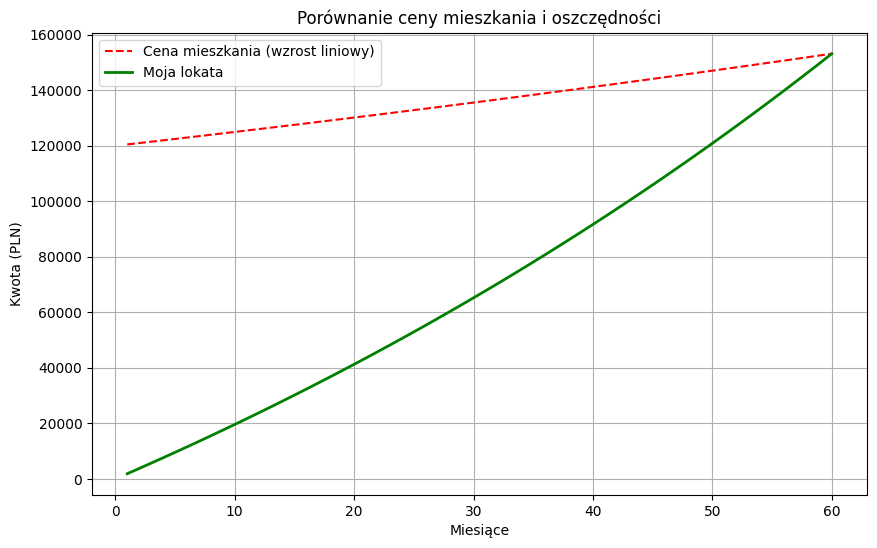

In [80]:
plt.figure(figsize=(10, 6))

# Linia ceny mieszkania
plt.plot(timeline, flat_prices, label='Cena mieszkania (wzrost liniowy)', color='red', linestyle='--')

# Linia oszczędności
plt.plot(timeline, savings_values, label='Moja lokata', color='green', linewidth=2)

plt.title('Porównanie ceny mieszkania i oszczędności')
plt.xlabel('Miesiące')
plt.ylabel('Kwota (PLN)')
plt.grid(True)

plt.legend()
plt.show()